In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, BatchNormalization, Dropout, LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import tensorflow as tf
import pandas as pd
import io
import os
import requests
from sklearn import metrics
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from os import path

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, Normalizer

from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [3]:
x_train = np.load("data/cic/x_train.npy")
y_train = np.load("data/cic/y_train.npy")

In [4]:
df = np.column_stack((x_train, y_train))
df.shape


(2120907, 34)

In [11]:
df

array([[-2.66375219e-01, -5.30211440e-03,  1.09252757e-01, ...,
        -1.19638306e-04, -2.72486399e-05,  0.00000000e+00],
       [ 2.26179340e-01,  2.03599418e-02,  1.68929054e-01, ...,
         2.97721187e-03,  1.08530706e-03,  0.00000000e+00],
       [-4.61317854e-01, -1.02541089e-02,  8.64149637e-02, ...,
        -2.78234208e-04, -1.89157679e-04,  0.00000000e+00],
       ...,
       [ 7.05190188e-02,  8.97245610e-01, -6.41452147e-03, ...,
        -3.46971794e-01,  3.23735707e-04,  0.00000000e+00],
       [ 8.77892132e-01, -3.58047017e-02, -6.06165254e-02, ...,
        -1.47530951e-03,  5.69896547e-05,  4.00000000e+00],
       [-4.37930089e-01, -7.99561237e-03,  9.15212380e-02, ...,
        -1.24998659e-03,  2.24039303e-04,  0.00000000e+00]])

In [12]:
%pip install sdv

Note: you may need to restart the kernel to use updated packages.


In [13]:
# from sdv.metadata import SingleTableMetadata

# metadata = SingleTableMetadata()
# metadata.detect_from_csv(filepath='combined_dataframe.csv')

In [14]:
# data = pd.read_csv('combined_dataframe.csv')

In [24]:
df = pd.DataFrame(df)

In [25]:
from sdv.metadata import SingleTableMetadata

metadata = SingleTableMetadata()

metadata.detect_from_dataframe(df)


In [26]:
from sdv.single_table import CTGANSynthesizer

synthesizer = CTGANSynthesizer(
    metadata,
    enforce_rounding=False,
    epochs=100,
    verbose=True,
    cuda = True
)

c:\Users\Indu\.conda\envs\ids\lib\site-packages\sdv\single_table\base.py:92: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


In [27]:
synthesizer.fit(df)

Gen. (0.52) | Discrim. (0.20): 100%|██████████| 100/100 [38:26:46<00:00, 1384.06s/it]    


In [28]:
synthesizer.save(
    filepath='my_synthesizer.pkl'
)

In [ ]:
%pip install secure-smtplib

In [ ]:
import smtplib
# creates SMTP session
s = smtplib.SMTP('smtp.gmail.com', 587)
# start TLS for security
s.starttls()
# Authentication
s.login("dummysmtpmail97@gmail.com", "cjntowmtuucpoele")
# message to be sent
message = "ctgan train done done"
# sending the mail
s.sendmail("dummysmtpmail97@gmail.com", "ashu.kavita2003@gmail.com", message)
# terminating the session
s.quit()

In [42]:
print(df.columns)
print(df.columns[-1])

RangeIndex(start=0, stop=34, step=1)
33


In [44]:
from sdv.sampling import Condition
# Calculate label frequencies
label_counts = last_column = df.iloc[:, -1].value_counts()

# Calculate ratios
label_ratios = label_counts / len(df)

# Invert ratios to determine synthetic data ratios
synthetic_ratios = 1 / label_ratios
synthetic_ratios /= synthetic_ratios.sum()  # Normalize to sum to 1

# Define conditions based on inverted ratios
conditions = []
for label, ratio in synthetic_ratios.items():
    num_rows = int(len(df) * ratio)
    condition = Condition(
        num_rows=num_rows,
        column_values={'33': label}
    )
    conditions.append(condition)

# Generate synthetic data based on conditions
synthetic_data = synthesizer.sample_from_conditions(
    conditions=conditions,
    output_file_path='synthetic_data.csv'
)

# Print the synthetic data to check
print(synthetic_data)

Sampling conditions: 100%|██████████| 2120903/2120903 [38:41<00:00, 913.55it/s]

                0         1         2         3         4         5         6  \
0       -0.597938 -0.010752  0.094154 -0.120318  0.279703  0.112593  0.009756   
1       -0.711872 -0.011399  0.058404 -0.179454 -0.439726 -0.228201 -0.018292   
2       -0.539700 -0.011474  0.091384 -0.107662  0.291769 -0.031564 -0.005882   
3       -0.252004 -0.006887  0.267567  0.059978  0.476399 -0.005516 -0.010571   
4       -0.219221  0.008190  0.019219 -0.011741  0.157757  0.216943  0.001018   
...           ...       ...       ...       ...       ...       ...       ...   
2120898  0.083284  0.149365  0.057414  0.142866 -0.195008 -0.010107 -0.001173   
2120899  0.071955  0.000390 -0.090571  0.114353  0.034716 -0.034431 -0.010990   
2120900  0.306847  0.146602  0.032609  0.292885 -0.072663  0.378596 -0.003848   
2120901 -0.549186 -0.012062  0.076730 -0.183126 -0.046547 -0.060352 -0.007831   
2120902 -0.587987 -0.006964  0.061223 -0.069925  0.232995 -0.025047 -0.000550   

                7         8

In [50]:
df.columns = df.columns.astype(str)
synthetic_data.columns = synthetic_data.columns.astype(str)

In [51]:
print(df.columns)
print(synthetic_data.columns)

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33'],
      dtype='object')
Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33'],
      dtype='object')


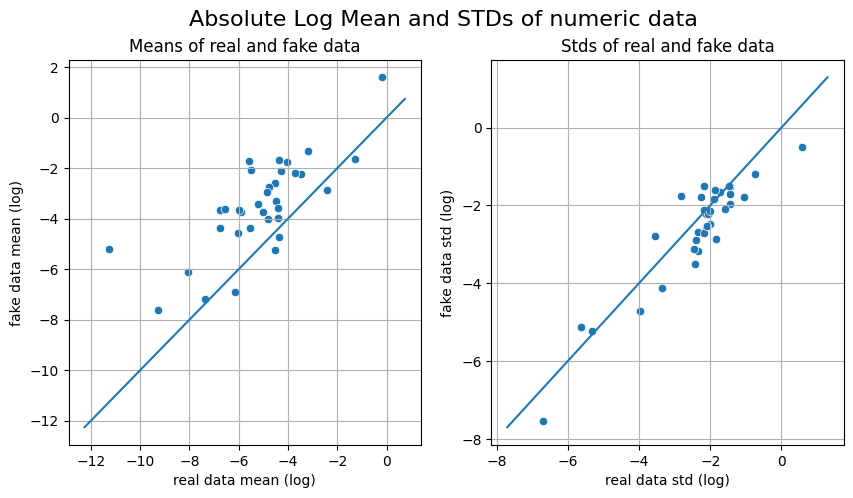

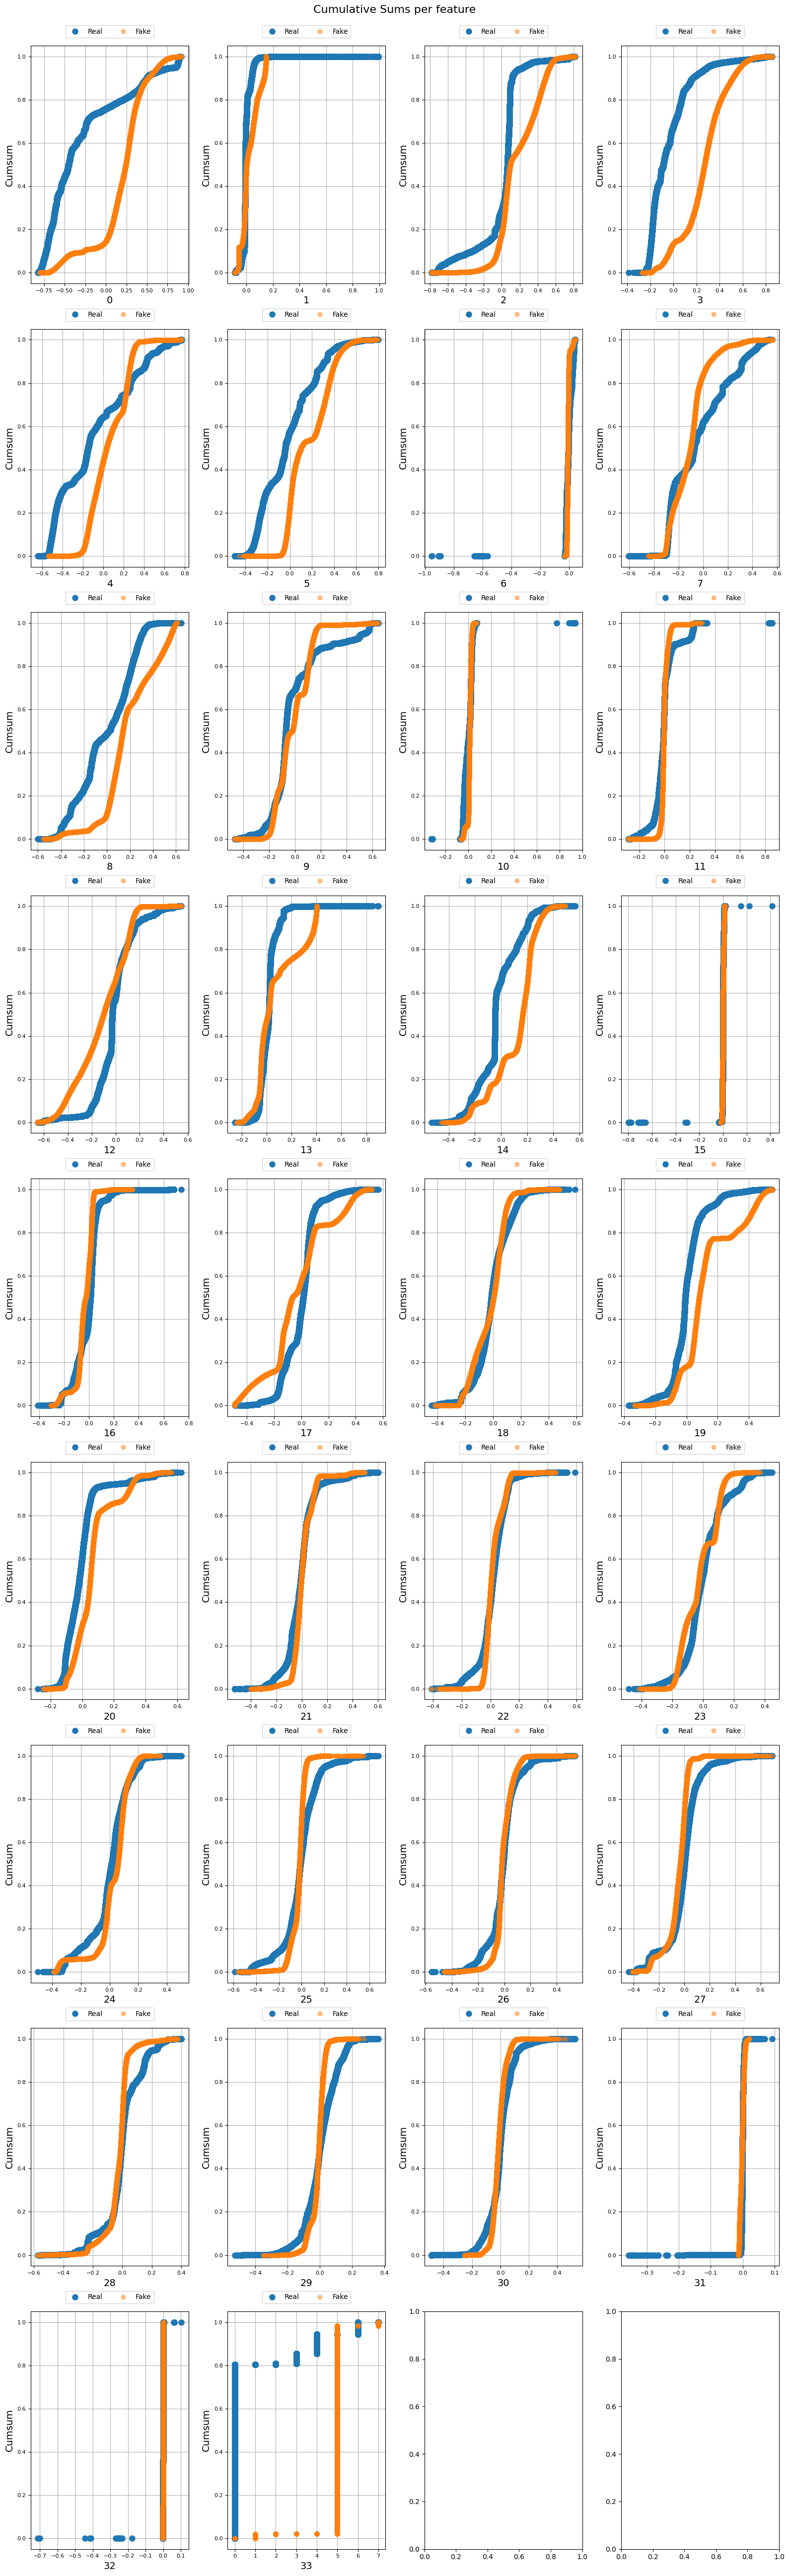

c:\Users\Indu\.conda\envs\ids\lib\site-packages\table_evaluator\table_evaluator.py:183: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout(rect=[0, 0.02, 1, 0.98])
c:\Users\Indu\.conda\envs\ids\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


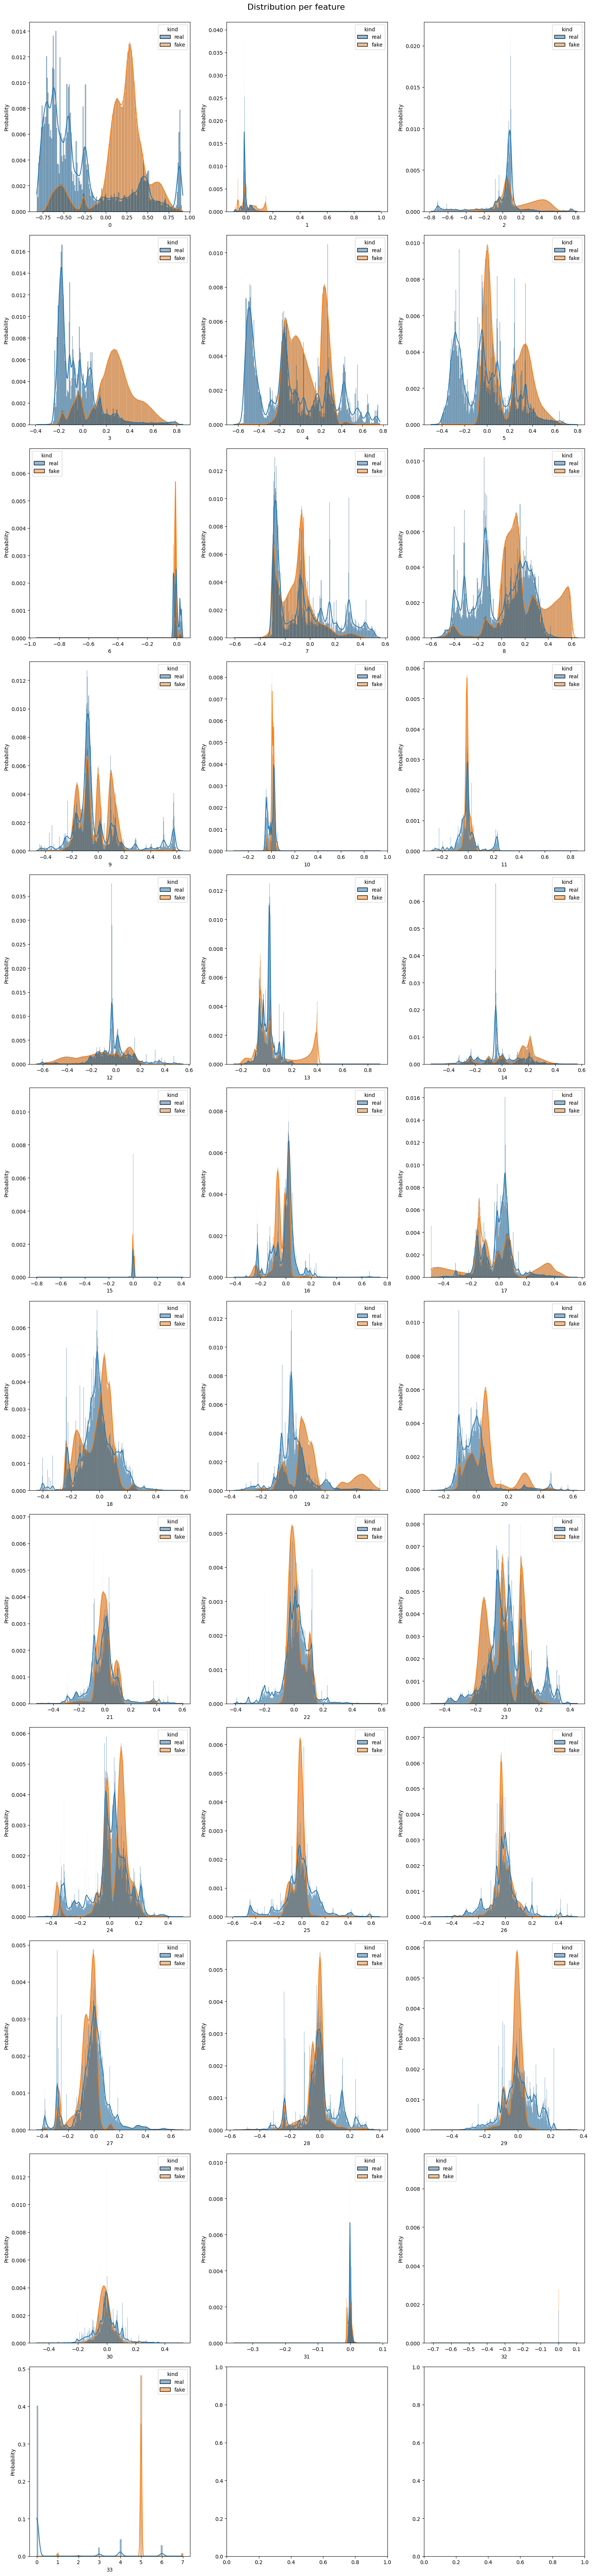

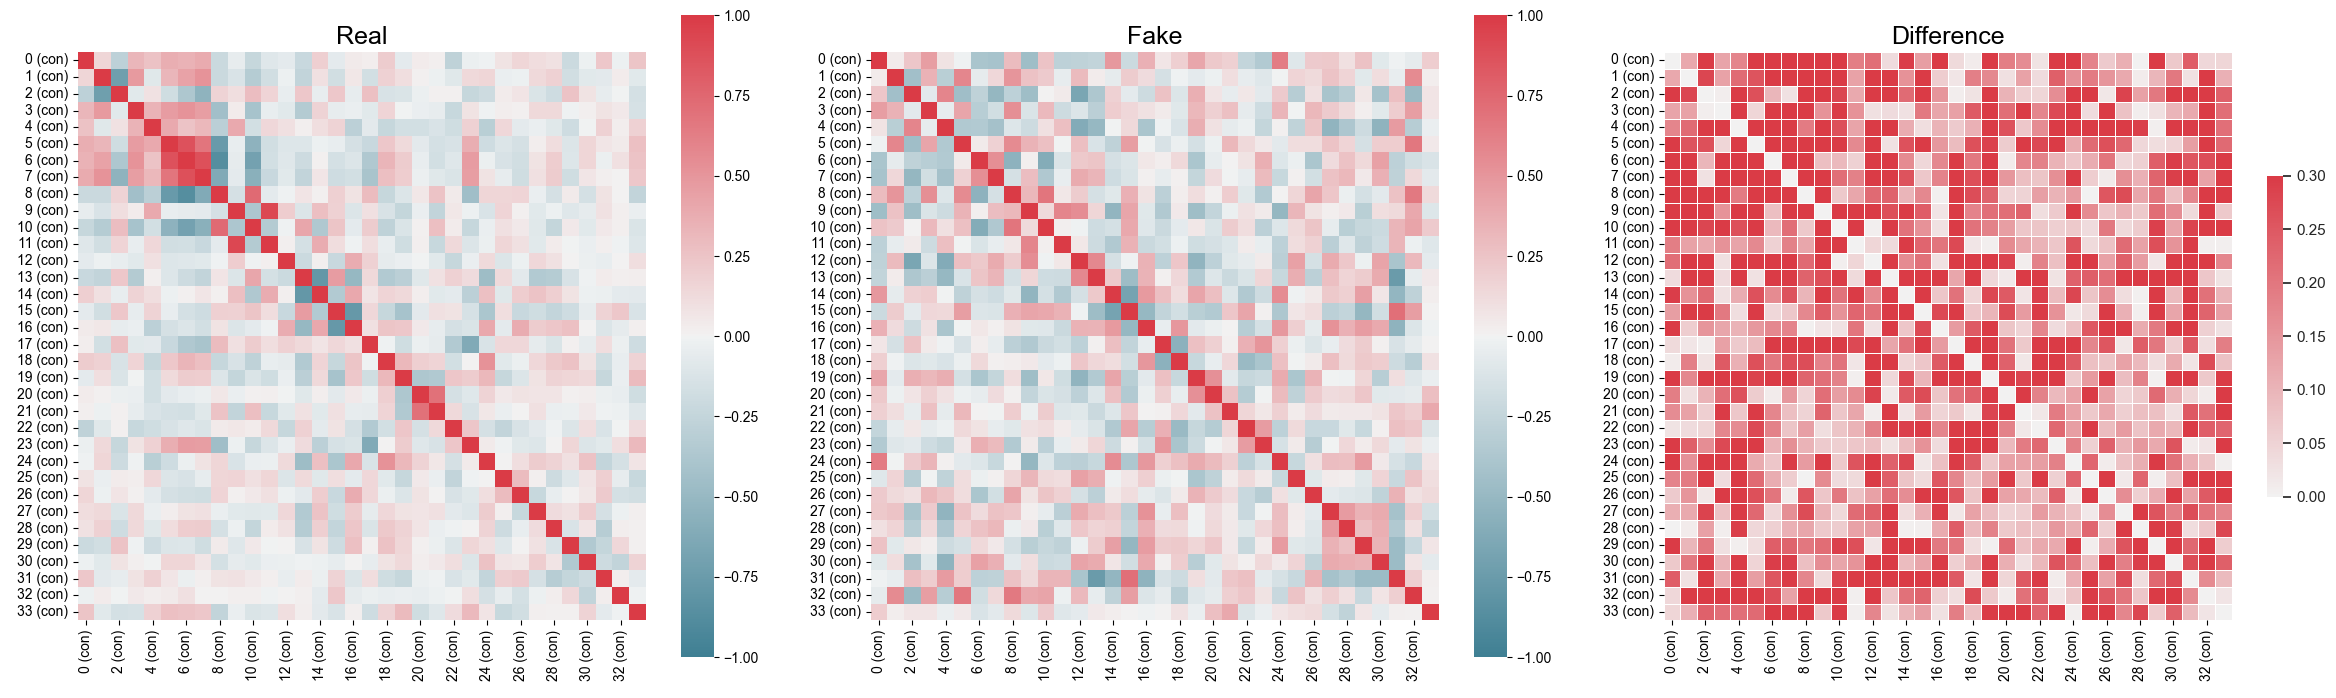

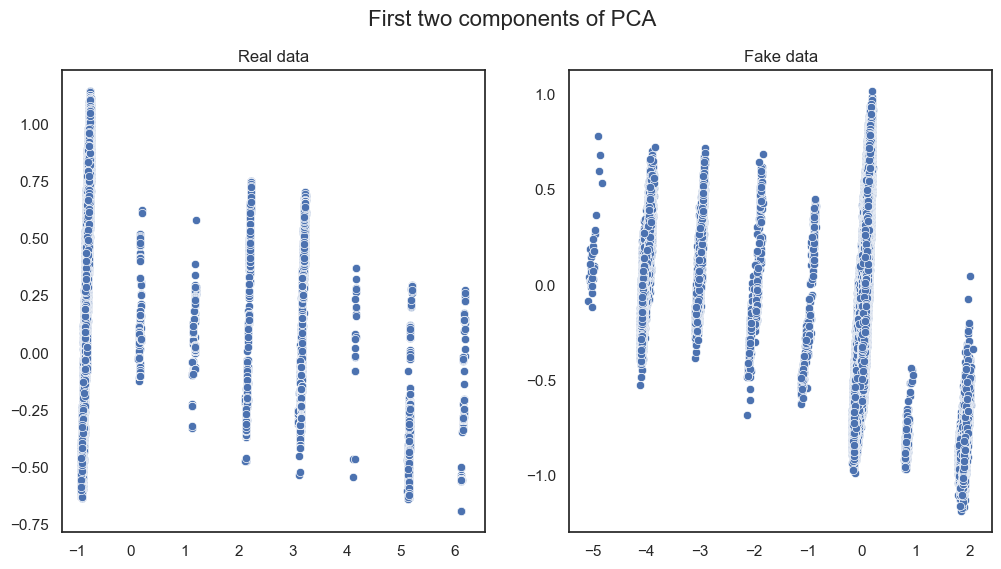

In [52]:
import table_evaluator
from table_evaluator import TableEvaluator


table_evaluator =  TableEvaluator(pd.DataFrame(df), pd.DataFrame(synthetic_data))

table_evaluator.visual_evaluation()

In [ ]:
import smtplib
# creates SMTP session
s = smtplib.SMTP('smtp.gmail.com', 587)
# start TLS for security
s.starttls()
# Authentication
s.login("dummysmtpmail97@gmail.com", "cjntowmtuucpoele")
# message to be sent
message = "ctgan code done"
# sending the mail
s.sendmail("dummysmtpmail97@gmail.com", "ashu.kavita2003@gmail.com", message)
# terminating the session
s.quit()

In [54]:

synthetic_df = pd.read_csv('synthetic_data.csv')
synthetic_df.head()


,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,-0.597938,-0.010752,0.094154,-0.120318,0.279703,0.112593,0.009756,-0.179301,-0.130222,0.087186,...,-0.305335,0.032248,-0.061719,-0.294522,-0.234251,-0.017148,0.000246,0.004281,0.000694,0.0
1,-0.711872,-0.011399,0.058404,-0.179454,-0.439726,-0.228201,-0.018292,-0.287774,0.108631,-0.101066,...,0.122035,-0.020476,0.008490,0.029194,-0.015340,-0.077633,0.136922,-0.000869,-0.000803,0.0
2,-0.539700,-0.011474,0.091384,-0.107662,0.291769,-0.031564,-0.005882,-0.095826,-0.131969,0.477072,...,-0.292805,0.126304,0.160959,-0.255789,-0.004964,-0.112713,0.003618,0.001891,-0.000034,0.0
3,-0.252004,-0.006887,0.267567,0.059978,0.476399,-0.005516,-0.010571,-0.199971,0.322636,-0.186294,...,-0.007103,-0.004339,0.070822,-0.085231,-0.003218,0.010818,-0.027804,0.001670,-0.000047,0.0
4,-0.219221,0.008190,0.019219,-0.011741,0.157757,0.216943,0.001018,0.057223,-0.164756,-0.393206,...,0.057889,0.462649,0.109848,0.160342,-0.306783,-0.002959,-0.017071,0.004874,-0.000652,0.0


In [56]:
# Separate features and labels
A = synthetic_df.drop(columns=['33'])
b = synthetic_df['33']

# Split the data
a_train, a_test, b_train, b_test = train_test_split(
    A, b, test_size=0.25, random_state=42, stratify=b
)
A

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,-0.597938,-0.010752,0.094154,-0.120318,0.279703,0.112593,0.009756,-0.179301,-0.130222,0.087186,...,0.033119,-0.305335,0.032248,-0.061719,-0.294522,-0.234251,-0.017148,0.000246,0.004281,0.000694
1,-0.711872,-0.011399,0.058404,-0.179454,-0.439726,-0.228201,-0.018292,-0.287774,0.108631,-0.101066,...,-0.145263,0.122035,-0.020476,0.008490,0.029194,-0.015340,-0.077633,0.136922,-0.000869,-0.000803
2,-0.539700,-0.011474,0.091384,-0.107662,0.291769,-0.031564,-0.005882,-0.095826,-0.131969,0.477072,...,-0.019306,-0.292805,0.126304,0.160959,-0.255789,-0.004964,-0.112713,0.003618,0.001891,-0.000034
3,-0.252004,-0.006887,0.267567,0.059978,0.476399,-0.005516,-0.010571,-0.199971,0.322636,-0.186294,...,-0.006599,-0.007103,-0.004339,0.070822,-0.085231,-0.003218,0.010818,-0.027804,0.001670,-0.000047
4,-0.219221,0.008190,0.019219,-0.011741,0.157757,0.216943,0.001018,0.057223,-0.164756,-0.393206,...,0.233541,0.057889,0.462649,0.109848,0.160342,-0.306783,-0.002959,-0.017071,0.004874,-0.000652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2120898,-0.267318,-0.005227,-0.047356,0.012454,-0.015882,0.372751,0.032688,0.304383,-0.359572,0.016572,...,0.173910,0.109374,-0.065740,-0.033294,-0.046041,0.064493,0.046063,0.060527,-0.001955,-0.000066
2120899,-0.239160,0.000693,0.034842,0.024343,-0.120830,0.316672,0.033430,0.397153,-0.428543,0.026723,...,0.166599,0.105627,-0.101945,-0.014165,-0.183073,0.053014,0.034191,0.053036,-0.001116,-0.000232
2120900,-0.257470,-0.004940,-0.099627,-0.026605,-0.107104,0.297557,0.031223,0.317099,-0.447915,0.032329,...,0.138859,0.106075,-0.119255,0.001884,-0.033048,0.072959,0.041170,0.051854,-0.001051,-0.000517
2120901,-0.276132,0.006824,-0.015248,0.015122,-0.121826,0.343810,0.030821,0.294125,-0.405433,0.026873,...,0.165545,0.117351,-0.086677,-0.036078,-0.059336,0.096463,0.029346,0.072437,-0.001510,-0.000356


In [57]:
np.save("new_a1_train.npy", a_train)
np.save("new_b1_train.npy", b_train)
np.save("new_a1_test.npy", a_test)
np.save("new_b1_test.npy", b_test)